# 案例 房价预测

## 导入所需库

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## 导入数据集

In [3]:
test=pd.read_csv("test.csv")
# test.head()
train =pd.read_csv("train.csv")
# train.head()
#describe函数可以统计数据信息，不加上include=all的话默认统计数值型数据
# train.describe(include="all")
# test.describe(include="all")
# print("train: \n",train.describe(include="all"))
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 数据预处理
### 删除无关列
<details>
    <summary><i>其中各列名的含义如下 （点击查看）</i></summary>

|名称|含义|
|:-:|:-:|
|SalePrice|销售价格|
|MSSubClass|建筑类
|LotFrontage |直线距离|
|LotArea|土地面积（平凡英尺）|
|Street |路的类型|
|Alley  |胡同类型|
|LotShape|房产的形状（是否规则）|
|LandCounter |房产的平坦度|
|Utitles |公共设备 设施|
|LotConfig|划分配置|
|LandSlope|斜坡程度|
|Neighborhood |在Ames city范围的物理位置|
|Condition1|接近各种条件|
|Condition2 |接近各种条件|
|BldgType |住宅的类型|
|HouseStyle |住宅的风格|
|OverallQual |给房屋整体材料和装修评分|
|OverallCond |为房屋的整体状况评分|
|YearBuilt |建造日期|
|YearRemodAdd |重新改造日期|
|RoofStyle |屋顶的类型|
|RoofMatl |屋顶材料|
|Exterior1st|房屋外部覆盖物|
|Exterior2nd|房屋外部覆盖物(不止一种)|
|MasVnrType |砌体单板类型|
|MasVnrArea |单位买诺记的砌体木皮面积|
|ExterQual |外部材料的质量评价|
|ExterCond|评估外部材料的现状|
|Foundation |基础类型|
|BsmtQual |评估地下室的高度|
|BsmtCond |评估地下室的一般状况|
|BsmtExposure |出口或花园墙壁曝光程度|
|BsmtFinType1 |地下室完工面积比|
|BsmtFinSF1 |类型1完成平方英尺|
|BsmtFinType2 |地下室完工面积比（如果不止一种）|
|BsmtFinSF2 |类型2完成平方英尺|
|BsmtUnfsF |未完成的地下室平方英尺|
|TotalBsmtSF |地下室总面积|
|Heating QC| 热暖质量和条件|
|CentraAir | 是否有中央空调|
|Electrical |电气系统|
|1stFlrSP|一楼平方英尺|
|2ndFlrSF |二楼平方英尺|
|LowQualFinSF|低质量完成平方英尺（所有地板）|
|GrLivArea|高于（地面）居住面积的平方英尺|
|BsmtFullBath|地下室完整的浴室|
|BsmtHalfBath|地下室半浴室|
|FullBath|高档浴室|
|HalfBath|高于等级的半浴室|
|Bedroom |地上的卧室|
|Kitchen| 高档厨房|
|KitchenQual |厨房质量评估|
|TotRmsAbvGrd |高档卧室（不包括浴室）|
|Functional|家庭功能|
|FireplaceQu |壁炉数量|
|FireplaceQu |壁炉质量|
|GarageType| 车库位置|
|GarageYrBlt |车库建成年份|
|GarageFinish | 车库的内部完成|
|GarageCars|车容量为单位的车库大小|
|GarageArea | 以平方英尺为单位的车库大小|
|GarageQua|车库质量|
|GarageCond |车库条件|
|PavedDrive |铺设车道|
|WoodDeckSF|木甲板面积(平方英尺的)|
|OpenPorchSF|打开门廊面积(以平方英尺)|
|EnclosedPorch|封闭门廊面积(以平方英尺)|
|3SsnPorch|门廊(三个平方英尺的)|
|ScreenPorch|屏幕门廊面积(平方英尺的)|
|PoolArea|以平方英尺为单位的泳池面积|
|PoolQC|泳池质量|
|Fence | 栅栏质量|
|MiscFeature |杂项功能未在其他类别中涵盖|
|MiscVal|杂项功能的价值|
|MoSold|月销量（MM）|
|YrSold|已售出年份（YYYY）|
|SaleType|销售类型|
|SaleCondition|销售条件|
    
</details>

In [4]:
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 检测异常值

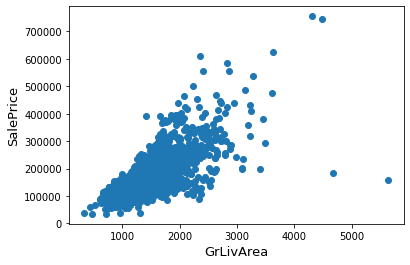

In [5]:
plt.figure()
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [6]:
# 删除右侧两个异常点
train[(train["GrLivArea"]>4000) & (train["SalePrice"]<300000)].index
train=train.drop(train[(train["GrLivArea"]>4000) & (train["SalePrice"]<300000)].index)

### 合并数据集

In [7]:
ntrain=train.shape[0]
ntest=train.shape[0]

#分离自变量和因变量
Xtrain=train.iloc[:,:-1]
Ytrain=train.iloc[:,-1]
# Ytrain.head()

#合并训练集和测试集
Xtrain=pd.concat((Xtrain,test))
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

### 处理缺失数据

In [8]:
def calcNull(data):
    nullSum=data.isnull().sum()
    nullSum=nullSum.drop(nullSum[nullSum.values==0].index)
    return nullSum

calcNull(Xtrain)


MSZoning           4
LotFrontage      486
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64

In [9]:
Xtrain["MSZoning"].value_counts(dropna=False)
print(Xtrain["MSZoning"].value_counts(dropna=False)) # 观察该字段的各个值
Xtrain["MSZoning"]=Xtrain["MSZoning"].fillna("None") #选择None作为缺失数据的填充
calcNull(Xtrain) #再次统计发现该字段已经不为空

RL         2263
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64


LotFrontage      486
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64

In [10]:
Xtrain["LotFrontage"].value_counts(dropna=False)
print(Xtrain["LotFrontage"].value_counts(dropna=False)) # 观察该字段的各个值
Xtrain["LotFrontage"]=Xtrain["LotFrontage"].fillna(0) #选择None作为缺失数据的填充
calcNull(Xtrain) #再次统计发现该字段已经不为空

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
138.0      1
182.0      1
168.0      1
313.0      1
133.0      1
Name: LotFrontage, Length: 129, dtype: int64


Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64